In [34]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

random_state = 41122

In [35]:
df = pd.read_csv('data/train.csv', index_col='id')
comp_test = pd.read_csv('data/train.csv', index_col='id')

df.head(10)

,premise,hypothesis,lang_abv,language,label
id,,,,,
5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
ed7d6a1e62,"Bir çiftlikte birisinin, ağıla kapatılmış bu ö...",Çiftlikte insanlar farklı terimler kullanırlar.,tr,Turkish,0
5a0f4908a0,ریاست ہائے متحدہ امریکہ واپس آنے پر، ہج ایف بی...,ہیگ کی تفتیش ایف بی آئی اہلکاروں کی طرف سے کی...,ur,Urdu,0
fdcd1bd867,From Cockpit Country to St. Ann's Bay,From St. Ann's Bay to Cockpit Country.,en,English,2
7cfb3d272c,"Look, it's your skin, but you're going to be i...",The boss will fire you if he sees you slacking...,en,English,1


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12120 entries, 5130fd2cb5 to 44301dfb14
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   premise     12120 non-null  object
 1   hypothesis  12120 non-null  object
 2   lang_abv    12120 non-null  object
 3   language    12120 non-null  object
 4   label       12120 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 568.1+ KB


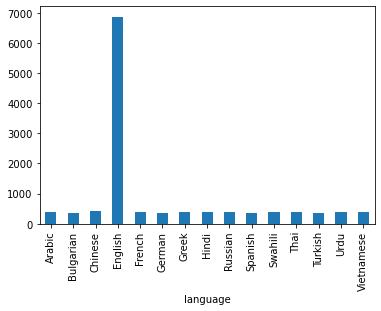

In [37]:
df.groupby('language').count()['lang_abv'].plot.bar();

In [38]:
df.groupby('language').count()['lang_abv']

language
Arabic         401
Bulgarian      342
Chinese        411
English       6870
French         390
German         351
Greek          372
Hindi          374
Russian        376
Spanish        366
Swahili        385
Thai           371
Turkish        351
Urdu           381
Vietnamese     379
Name: lang_abv, dtype: int64

In [39]:
df['label'].value_counts()

0    4176
2    4064
1    3880
Name: label, dtype: int64

Luckily, because this data comes from Kaggle, it looks quite clean with no missing or malformed data. The vast majority of the datapoints are in English, with about 400 or less from each other language. Hopefully, we'll need only to stratify during the train/test split in order to account for this (the target labels are just about evenly distributed, so we needn't stratify along that column), but depending, we may choose to deal only with English data, at least at first.

# Train-Test Split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('label', axis=1), df['label'], test_size=.2, stratify=df['language'], random_state=random_state)

In [42]:
X_train.head()

,premise,hypothesis,lang_abv,language
id,,,,
32050ed6ae,और यह लगता है कि यह एक छोटे से हास्यास्पद दस ...,यह क्या पागलपन है जो यह कोर्ट का केस सालों साल...,hi,Hindi
d55efad854,"'Wait here,' I was ordered.",He told me to wait until he opened the gate.,en,English
b09687d18f,"Table 2: Examples of BLM's, FHWA's, IRS's, and...","BLM's, FHWA's, IRS's, and VBA's are the only c...",en,English
789ca56aec,Le site Web de MCI énonce la méthode prévue po...,Le site web du MCI a des consignes qui sont fa...,fr,French
b5b1303cc0,He celebrated the fact by announcing that the ...,The capital moved from Calcutta to a new city.,en,English


In [47]:
y_train.head()

id
32050ed6ae    1
d55efad854    1
b09687d18f    1
789ca56aec    1
b5b1303cc0    0
Name: label, dtype: int64